# Confusion Matrix and ROC Examples

+ Using the Pima Indians Diabetes dataset, we want to forecast the occurence of diabetes from eight numerical features.  
+ Metadata for the features are found in the "README.txt" file.  
+ Binary logistic regression is used.  

###  Load and describe the data

In [5]:
%matplotlib inline
# data and stats packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
# load and describe the data
datapath = '../Data/pima-indians-diabetes.csv'
pima_df = pd.read_csv(datapath)
display(pima_df.describe([0.5]))
# check the counts per label
pima_df.groupby('label').count()

,pregnant,glucose,bp,skin,insulin,bmi,pedigre,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,pregnant,glucose,bp,skin,insulin,bmi,pedigre,age
label,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### Split and Fit

In [9]:
# split, fit, predict
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(pima_df.iloc[:,:-1], pima_df.iloc[:,-1], test_size=test_size, random_state=123)

lrg = LogisticRegression(solver='lbfgs', max_iter=200)
lrg.fit(X_train, y_train)

y_fit = lrg.predict(X_train)
y_pred = lrg.predict(X_test)

### Confusion Matrix

In [13]:
confmat_in = confusion_matrix(y_train, y_fit)
confmat = confusion_matrix(y_test, y_pred)

print("in-sample confusion matrix")
print('act\pred | class-0  class-1')
print('---------------------------')
print('class-0  |{0:8d} {1:8d}'.format(confmat_in[0, 0], confmat_in[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(confmat_in[1, 0], confmat_in[1, 1]))

print("\nout-of-sample confusion matrix")
print('act\pred | class-0  class-1')
print('---------------------------')
print('class-0  |{0:8d} {1:8d}'.format(confmat[0, 0], confmat[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(confmat[1, 0], confmat[1, 1]))

in-sample confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |     342       39
class-1  |      90      105

out-of-sample confusion matrix
act\pred | class-0  class-1
---------------------------
class-0  |     107       12
class-1  |      27       46


### Metrics

In [17]:
acc_in = accuracy_score(y_train, y_fit)
prec_in = precision_score(y_train, y_fit)
rec_in = recall_score(y_train, y_fit)
f1_in = f1_score(y_train, y_fit)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("metric      in-sample   out-of-sample")
print("-------------------------------------")
print("accuracy     {0:8.3f}        {1:8.3f}".format(acc_in, acc))
print("precision     {0:8.3f}        {1:8.3f}".format(prec_in, prec))
print("recall           {0:8.3f}        {1:8.3f}".format(rec_in, rec))
print("F1               {0:8.3f}        {1:8.3f}".format(f1_in, f1))

metric      in-sample   out-of-sample
-------------------------------------
accuracy        0.776           0.797
precision        0.729           0.793
recall              0.538           0.630
F1                  0.619           0.702


### ROC curve

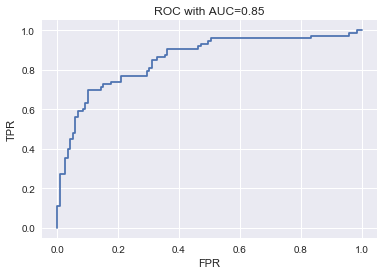

In [6]:
# prediction probabilities
# predict_proba() returns a two-column matrix, with the probabilities of the 0 and 1 class
# here we keep only the probability of the 1 class, i.e. to have diabetes
y_pred_prob = lrg.predict_proba(X_test)[:, 1]

# compute ROC and AUC
fpr, tpr, thr = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# plot ROC
plt.plot(fpr, tpr)
plt.title("ROC with AUC={0:3.2f}".format(auc))
plt.xlabel('FPR')
plt.ylabel('TPR');